<a href="https://colab.research.google.com/github/RisalahNaufal/SPK_NLP-WORDCLOUD/blob/main/008_Preprocessing_TF_IDF(studi_kasus_Indihome).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving indihome1.csv to indihome1.csv


In [ ]:
import pandas as pd

df = pd.read_csv('indihome1.csv', sep=';')
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Tue Nov 14 02:16:51 +0000 2023,1724250007677898895,Cb rekomendasi internet selain biznet sama ind...,0,2,0,0,in,66042909,1724250007677898895,aagustineh,https://twitter.com/aagustineh/status/17242500...
1,Mon Nov 13 11:48:46 +0000 2023,1724031545818992763,"jujur kesel bgt, udh jaringan by.u error mulu ...",0,1,0,1,in,1092429565027266561,1724031545818992763,sundakentel,https://twitter.com/sundakentel/status/1724031...
2,Mon Nov 13 10:48:39 +0000 2023,1724016419439014113,"IndiHome merah dari 2 hari yang lalu, Telkomse...",0,1,0,0,in,1613306567524511745,1724016419439014113,Adhan900,https://twitter.com/Adhan900/status/1724016419...
3,Mon Nov 13 09:50:50 +0000 2023,1724001869092229408,@IndiHomeCare baru awal bulan indihome udah le...,0,1,0,0,in,2919072671,1724001869092229408,pzzzzzzt,https://twitter.com/pzzzzzzt/status/1724001869...
4,Mon Nov 13 08:50:33 +0000 2023,1723986699615887805,Nyuruh mba ulan tolong gantiin wifi myreb atau...,0,1,0,0,in,1510228515886575622,1723986699615887805,EloisListon,https://twitter.com/EloisListon/status/1723986...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           309 non-null    object
 1   id_str               309 non-null    int64 
 2   full_text            309 non-null    object
 3   quote_count          309 non-null    int64 
 4   reply_count          309 non-null    int64 
 5   retweet_count        309 non-null    int64 
 6   favorite_count       309 non-null    int64 
 7   lang                 309 non-null    object
 8   user_id_str          309 non-null    int64 
 9   conversation_id_str  309 non-null    int64 
 10  username             309 non-null    object
 11  tweet_url            309 non-null    object
dtypes: int64(7), object(5)
memory usage: 29.1+ KB


In [ ]:
df.isnull().sum()

created_at             0
id_str                 0
full_text              0
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
del df['created_at']
del df['id_str']
del df['quote_count']
del df['reply_count']
del df['retweet_count']
del df['favorite_count']
del df['lang']
del df['user_id_str']
del df['conversation_id_str']
del df['username']
del df['tweet_url']

In [ ]:
df.head()

,full_text
0,Cb rekomendasi internet selain biznet sama ind...
1,"jujur kesel bgt, udh jaringan by.u error mulu ..."
2,"IndiHome merah dari 2 hari yang lalu, Telkomse..."
3,@IndiHomeCare baru awal bulan indihome udah le...
4,Nyuruh mba ulan tolong gantiin wifi myreb atau...


In [ ]:
pip install nltk

In [ ]:
pip install Sastrawi

In [ ]:
from io import TextIOWrapper #  membaca dan menulis string ke file, yang biasanya dalam bentuk byte.
import re # Ekspresi reguler memungkinkan pencarian pola dalam teks
from nltk.tokenize import word_tokenize # memisahkan kata-kata dalam teks
from nltk.corpus import stopwords # menghapus kata" yang dianggap tidak penting
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #membuat objek stemmer yang dapat mengubah kata-kata berimbuhan dalam bahasa Indonesia menjadi bentuk dasarnya.
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory #membuat objek yang dapat menghapus stopwords dalam bahasa Indonesia dari teks.
from wordcloud import WordCloud #membuat visualisasi dari frekuensi kata dalam bentuk awan kata

In [ ]:
def cleaning(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#[A-Za-z0-9]+', '', text)
  text = re.sub(r'RT[\s]', '', text)
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'[0-9]+', '', text)
  text = re.sub(r'layanan','',text)
  text = re.sub(r'kebijakan','',text)
  text = re.sub(r'privasi','',text)

  text = text.replace('\n', ' ')
  text = text.strip(' ')
  return text

def casefolding(text):
  text = text.lower()
  return text

def tokenizing(text):
  text = word_tokenize(text)
  return text

def stopword(text):
  listStopword = set(stopwords.words('indonesian'))
  filtered = []
  for txt in text:
    if txt not in listStopword:
      filtered.append(txt)
    text = filtered
    return text

def steming(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  text = [stemmer.stem(word) for word in text]
  return text

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['clean_tweets'] = df['full_text'].apply(cleaning)
df['clean_tweets'] = df['clean_tweets'].apply(casefolding)
df.drop(['full_text'], axis=1, inplace=True)

df['preprocessed'] = df['clean_tweets'].apply(tokenizing)
df['preprocessed'] = df['preprocessed'].apply(stopword)
df['preprocessed'] = df['preprocessed'].apply(steming)

df.drop_duplicates(subset = 'clean_tweets', inplace=True)

In [ ]:
df.to_csv('cleaned1.csv')

In [ ]:
df = pd.read_csv('cleaned.csv')
df.head()

,Unnamed: 0,clean_tweets,preprocessed
0,0,info dong indihome lagi gangguan kah ??? udh d...,['info']
1,1,"wifi kosku goblok banget njirr, udah siap refr...",['wifi']
2,2,mohon cek dm,['mohon']
3,3,mohon pastikan terlebih dahulu kabel patch cor...,['mohon']
4,4,nyari remot indihome di mana sih??? urgent ban...,['nyari']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer # digunakan untuk mengonversi koleksi dokumen mentah menjadi matriks fitur TF-IDF

# Baca data dari file CSV
data = pd.read_csv("cleaned1.csv")

clean_tweets = "clean_tweets"

# Inisialisasi objek TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menghitung TF-IDF dari kolom teks
tfidf_matrix = tfidf_vectorizer.fit_transform(data[clean_tweets])

# Mendapatkan daftar kata (fitur)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menghitung jumlah kata (n), total TF, total IDF, dan TF-IDF untuk setiap kata
n_words = []
total_tf = []
total_idf = []
tfidf_values = []

for word, idx in zip(feature_names, range(len(feature_names))):
    # Hitung jumlah dokumen yang mengandung kata (n)
    n = len([doc for doc in data[clean_tweets] if word in doc])

    # Hitung total TF (Term Frequency) untuk kata tersebut
    tf = tfidf_matrix[:, idx].sum()

    # Hitung total IDF (Inverse Document Frequency) untuk kata tersebut
    idf = tfidf_vectorizer.idf_[idx]

    # Hitung total TF-IDF
    tfidf = tf * idf

    # Simpan nilai dalam daftar
    n_words.append(n)
    total_tf.append(tf)
    total_idf.append(idf)
    tfidf_values.append(tfidf)

# Membuat DataFrame dengan hasil TF-IDF
tfidf_df = pd.DataFrame({'n': n_words, 'word': feature_names, 'total_tf': total_tf, 'total_idf': total_idf, 'tfidf': tfidf_values})

# Menampilkan hasil TF-IDF dalam bentuk DataFrame
print(tfidf_df)
tfidf_df.to_csv('cleaned_tfidf1.csv')

      n         word  total_tf  total_idf     tfidf
0     4           __  1.021404   5.343805  5.458185
1     1       ______  0.507240   6.036953  3.062184
2     1        _tama  0.245163   6.036953  1.480040
3     4        aaaaa  0.239940   6.036953  1.448504
4     1      aaaaaaa  0.436155   6.036953  2.633044
...  ..          ...       ...        ...       ...
1118  1  yourlacunas  0.231825   6.036953  1.399518
1119  1           yt  0.394228   6.036953  2.379939
1120  1        yutub  0.464432   6.036953  2.803751
1121  1         zonk  0.251192   6.036953  1.516433
1122  1         zoom  0.371617   6.036953  2.243436

[1123 rows x 5 columns]


In [ ]:
tfidf_df= pd.read_csv('cleaned_tfidf1.csv')
tfidf_df.head()

,Unnamed: 0,n,word,total_tf,total_idf,tfidf
0,0,4,__,1.021404,5.343805,5.458185
1,1,1,______,0.507240,6.036953,3.062184
2,2,1,_tama,0.245163,6.036953,1.480040
3,3,4,aaaaa,0.239940,6.036953,1.448504
4,4,1,aaaaaaa,0.436155,6.036953,2.633044


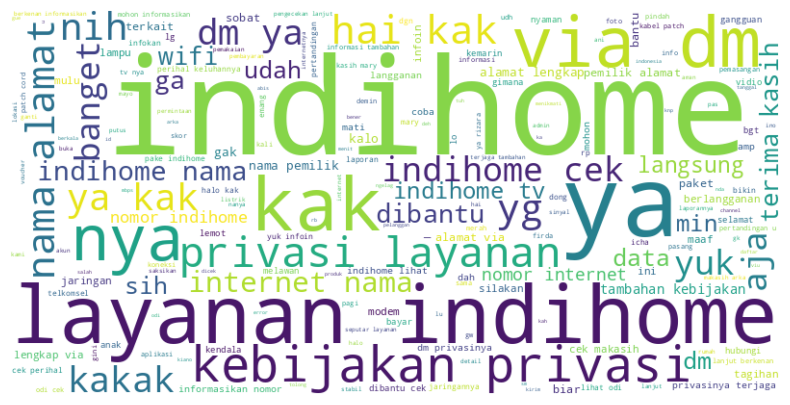

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df['clean_tweets'])

# Menggunakan daftar stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))

# Menghapus stop words dari teks
filtered_text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Tampilkan word cloud dengan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter
from tabulate import tabulate

# Hitung frekuensi kata
word_freq = Counter(filtered_text.split())

# Tampilkan head dan urutkan dari frekuensi tinggi ke rendah
df_word_freq = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)

# Reset index to remove it permanently
df_word_freq = df_word_freq.reset_index(drop=True)

# Now you can use df_word_freq.head()
df_word_freq.head(30)

,Word,Frequency
0,indihome,204
1,dm,71
2,layanan,62
3,kak,60
4,cek,49
5,ya.,43
6,ya,41
7,via,40
8,nomor,39
9,alamat,39
